# Data cleansing:

*Importar bibliotecas:*

In [1]:
import pandas as pd
import numpy as np

**Importar datasets e checar informações:**

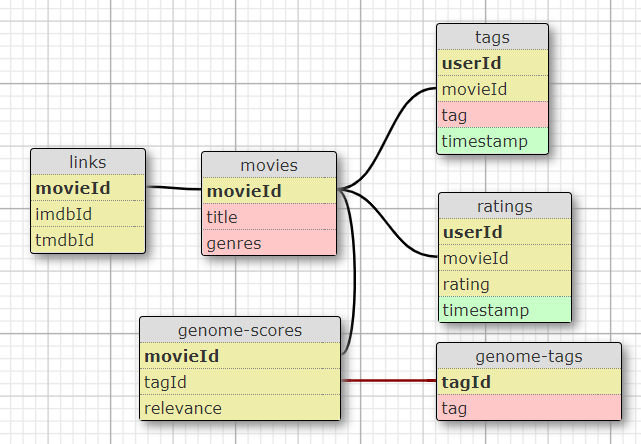

In [2]:
#importar databasese Movie Lens e checar tamanhos
g_scores = pd.read_csv('../raw_data/ml-25m/genome-scores.csv')#, nrows = 1000000)
g_tags = pd.read_csv('../raw_data/ml-25m/genome-tags.csv')#, nrows = 1000000)
links = pd.read_csv('../raw_data/ml-25m/links.csv')
movies = pd.read_csv('../raw_data/ml-25m/movies.csv')
ratings = pd.read_csv('../raw_data/ml-25m/ratings.csv') #nrows = 1000000)
tags = pd.read_csv('../raw_data/ml-25m/tags.csv')

In [3]:
print(f'Formato da base g_scores:',(g_scores.shape))
print(f'Formato da base g_tags:',(g_tags.shape))
print(f'Formato da base links:',(links.shape))
print(f'Formato da base movies:',(movies.shape))
print(f'Formato da base ratings:',(ratings.shape))
print(f'Formato da base tags:',(tags.shape))

Formato da base g_scores: (15584448, 3)
Formato da base g_tags: (1128, 2)
Formato da base links: (62423, 3)
Formato da base movies: (62423, 3)
Formato da base ratings: (25000095, 4)
Formato da base tags: (1093360, 4)


## Análise exploratória:

### Genome-scores:

In [4]:
g_scores.head(4)

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575


In [5]:
print(g_scores.isnull().sum())
g_scores.info()

movieId      0
tagId        0
relevance    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
movieId      int64
tagId        int64
relevance    float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB


### Genome-tags:

In [6]:
g_tags.head(4)

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s


In [7]:
print(g_tags.isnull().sum())
g_tags.info()

tagId    0
tag      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
tagId    1128 non-null int64
tag      1128 non-null object
dtypes: int64(1), object(1)
memory usage: 17.7+ KB


### Links:

In [8]:
links.head(4)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0


In [9]:
print(links.isnull().sum())
links.info()

movieId      0
imdbId       0
tmdbId     107
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
movieId    62423 non-null int64
imdbId     62423 non-null int64
tmdbId     62316 non-null float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB


### Movies:

In [10]:
movies.head(4)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance


In [11]:
print(movies.isnull().sum())
movies.info()

movieId    0
title      0
genres     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
movieId    62423 non-null int64
title      62423 non-null object
genres     62423 non-null object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


### Ratings:

In [12]:
ratings.head(4)

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820


In [13]:
print(ratings.isnull().sum())
ratings.info()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
userId       int64
movieId      int64
rating       float64
timestamp    int64
dtypes: float64(1), int64(3)
memory usage: 762.9 MB


### Tags:

In [14]:
tags.head(4)

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604


In [15]:
print(tags.isnull().sum())
tags.info()

userId        0
movieId       0
tag          16
timestamp     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 4 columns):
userId       1093360 non-null int64
movieId      1093360 non-null int64
tag          1093344 non-null object
timestamp    1093360 non-null int64
dtypes: int64(3), object(1)
memory usage: 33.4+ MB


## Data Cleansing:

### Lista de filmes faltantes

In [16]:
#criação de dataframe missing_movies
missing_movies = links.copy()
#criação de campo 'empty' no dataframe
missing_movies['empty'] = missing_movies.tmdbId.notnull()
#check a na quantidade de valores sem tmdbId
print(missing_movies['empty'].value_counts())
missing_movies = missing_movies[missing_movies['empty'] == False]
missing_movies = missing_movies.merge(movies,on='movieId')
missing_movies.head(5)
#comando para remover filmes 
#missing_movies.to_html('missing_movies.html')

True     62316
False      107
Name: empty, dtype: int64


,movieId,imdbId,tmdbId,empty,title,genres
0,721,114103,NaN,False,Halfmoon (Paul Bowles - Halbmond) (1995),Drama
1,730,125877,NaN,False,Low Life (1994),Drama
2,770,38426,NaN,False,Costa Brava (1946),Drama
3,791,113610,NaN,False,"Last Klezmer: Leopold Kozlowski, His Life and ...",Documentary
4,1107,102336,NaN,False,Loser (1991),Comedy


### Lista de tags faltantes

In [17]:
#criação de campo 'empty' no dataframe
tags['empty'] = tags.tag.notnull()
#seleção apenas das rows que possuem tag
tags = tags[tags['empty']== True].drop(columns=['empty'])

In [18]:
print(f'quantidades de tags com zero:',tags.tag.isnull().sum())
tags.head(5)

quantidades de tags com zero: 0


,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


### Standardizing movie genres:

In [19]:
movies = movies.copy()
movies['genres'] = movies['genres'].str.replace("|"," ")

In [20]:
#função para transformar string em lista 
def movie_genres(x):
    # remover (no genres listed) 
    if x == '(no genres listed)':
        return ""
    else:
        return x.split()   

In [21]:
#(no genres listed) - remover
#movies[movies['genres']== '(no genres listed)'].replace()
movies['genres'] = movies['genres'].apply(movie_genres)
movies.head(3)

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"


In [22]:
from sklearn.preprocessing import MultiLabelBinarizer

labels = movies['genres']
mlb = MultiLabelBinarizer()
results = mlb.fit_transform(labels)
print(mlb.classes_)
col = list(mlb.classes_)
print(col)
print(results)

movies = movies.join(pd.DataFrame(results, 
                     columns=col,
                    index = movies.index))
# # movies = movies.join(pd.DataFrame(mlb.fit_transform(movies.pop('Col3')),
#                           columns=mlb.classes_,
#                           index=df.index))

['Action' 'Adventure' 'Animation' 'Children' 'Comedy' 'Crime'
 'Documentary' 'Drama' 'Fantasy' 'Film-Noir' 'Horror' 'IMAX' 'Musical'
 'Mystery' 'Romance' 'Sci-Fi' 'Thriller' 'War' 'Western']
['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
[[0 1 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]]


In [23]:
movies.head(4)

,movieId,title,genres,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


## API - The movie database

*Link para documentação:* \
https://www.themoviedb.org/documentation/api

In [24]:
import requests

In [25]:
def api_detail(id_):
    """
    function to get movie details from the tmdb api
    url example: https://api.themoviedb.org/3/movie/215?api_key=f43b45256508300c9a0553da491121f5&language=en-US
    """
    key = 'f43b45256508300c9a0553da491121f5'
    language = 'en-US' 
    
    
    try:
        url =f'https://api.themoviedb.org/3/movie/{id_}?api_key={key}&language={language}'
        response = requests.get(url)
       
        if response.status_code != 200:
            return None, None, None, None, None, None, None

        data = response.json() 
        
        lang = data['original_language']
        overview = data['overview']
        pop = data['popularity']
        release = data['release_date']
        runtime = data['runtime']
        vote_avg = data['vote_average']
        vote_count = data['vote_count']
        
        return {'language':lang, 'overview':overview,
                'popularity':pop, 'release':release, 
                'runtime':runtime, 'vote_average':vote_avg, 
                'vote_count': vote_count}
    
    
    except:
        return "","","","","","",""

api_detail('15602')

{'language': 'en',
 'overview': "A family wedding reignites the ancient feud between next-door neighbors and fishing buddies John and Max. Meanwhile, a sultry Italian divorcée opens a restaurant at the local bait shop, alarming the locals who worry she'll scare the fish away. But she's less interested in seafood than she is in cooking up a hot time with Max.",
 'popularity': 13.122,
 'release': '1995-12-22',
 'runtime': 101,
 'vote_average': 6.6,
 'vote_count': 217}

In [37]:
links_clean = links.dropna()
links_clean.shape

(62316, 3)

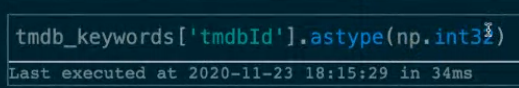

In [40]:
links_clean['tbdbId'] = links_clean['tmdbId'].astype(np.int32)

c:\users\bruno\.venvs\lewagon\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [43]:
links_clean

,movieId,imdbId,tmdbId,tbdbId
0,1,114709,862.0,862
1,2,113497,8844.0,8844
2,3,113228,15602.0,15602
3,4,114885,31357.0,31357
4,5,113041,11862.0,11862
5,6,113277,949.0,949
6,7,114319,11860.0,11860
7,8,112302,45325.0,45325
8,9,114576,9091.0,9091
9,10,113189,710.0,710


In [ ]:
links_clean['movie_details'] = links_clean['tbdbId'].apply(api_detail)